<a href="https://colab.research.google.com/github/benvictoria17/DataAnalytics/blob/main/Highest%20increase%20in%20coverage%20since%20ACA%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Health%20Insurance%20Coverage/states.csv", header=0)

In [3]:
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         52 non-null     object 
 1   Uninsured Rate (2010)                         52 non-null     object 
 2   Uninsured Rate (2015)                         52 non-null     object 
 3   Uninsured Rate Change (2010-2015)             52 non-null     object 
 4   Health Insurance Coverage Change (2010-2015)  52 non-null     int64  
 5   Employer Health Insurance Coverage (2015)     52 non-null     int64  
 6   Marketplace Health Insurance Coverage (2016)  52 non-null     int64  
 7   Marketplace Tax Credits (2016)                52 non-null     int64  
 8   Average Monthly Tax Credit (2016)             52 non-null     object 
 9   State Medicaid Expansion (2016)               51 non-null     objec

In [5]:
df.columns

Index(['State', 'Uninsured Rate (2010)', 'Uninsured Rate (2015)',
       'Uninsured Rate Change (2010-2015)',
       'Health Insurance Coverage Change (2010-2015)',
       'Employer Health Insurance Coverage (2015)',
       'Marketplace Health Insurance Coverage (2016)',
       'Marketplace Tax Credits (2016)', 'Average Monthly Tax Credit (2016)',
       'State Medicaid Expansion (2016)', 'Medicaid Enrollment (2013)',
       'Medicaid Enrollment (2016)', 'Medicaid Enrollment Change (2013-2016)',
       'Medicare Enrollment (2016)'],
      dtype='object')

In [6]:
str_percent_to_float = lambda x: float(x.strip(' ').strip('%'))/100
percent_to_convert = ['Uninsured Rate (2010)', 'Uninsured Rate (2015)', 'Uninsured Rate Change (2010-2015)']
df[percent_to_convert] = df[percent_to_convert].applymap(str_percent_to_float)

In [7]:
df.drop([51], inplace=True) # getting rid of total US info ... (maybe stupid)
df['State Medicaid Expansion (2016)'] = df['State Medicaid Expansion (2016)'].map(lambda x: int(x))

In [8]:
df_without_state = df.drop(['State'], axis=1)

In [9]:
df_without_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Uninsured Rate (2010)                         51 non-null     float64
 1   Uninsured Rate (2015)                         51 non-null     float64
 2   Uninsured Rate Change (2010-2015)             51 non-null     float64
 3   Health Insurance Coverage Change (2010-2015)  51 non-null     int64  
 4   Employer Health Insurance Coverage (2015)     51 non-null     int64  
 5   Marketplace Health Insurance Coverage (2016)  51 non-null     int64  
 6   Marketplace Tax Credits (2016)                51 non-null     int64  
 7   Average Monthly Tax Credit (2016)             51 non-null     object 
 8   State Medicaid Expansion (2016)               51 non-null     int64  
 9   Medicaid Enrollment (2013)                    49 non-null     float

In [10]:
from collections import Counter
uninsured_rate_change = df['Uninsured Rate Change (2010-2015)']
Counter([np.sign(change) for change in uninsured_rate_change[:-1]]).most_common()

[(-1.0, 50)]

Text(0, 0.5, 'Mean uninsured rate change (2010-2015)')

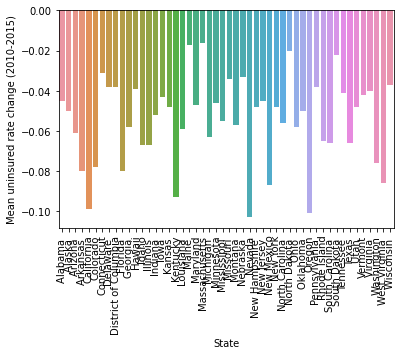

In [11]:
sns.barplot(x=df.State[:-1], y=uninsured_rate_change[:-1])
plt.xticks(rotation='vertical')
plt.xlabel('State')
plt.ylabel('Mean uninsured rate change (2010-2015)')

Text(0, 0.5, 'Mean uninsured rate change (2010-2015)')

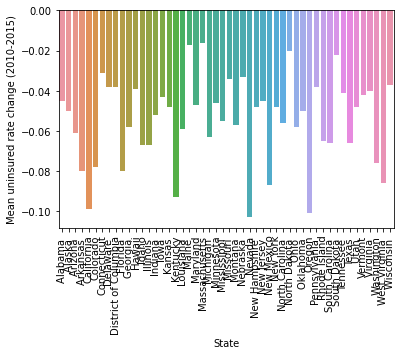

In [12]:
sns.barplot(x=df.State[:-1], y=uninsured_rate_change[:-1])
plt.xticks(rotation='vertical')
plt.xlabel('State')
plt.ylabel('Mean uninsured rate change (2010-2015)')